<a href="https://colab.research.google.com/github/k-vamshi/fbProphet-Time-series/blob/master/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Trends**

* trends.google.com is a public sercive provided by Google where they compiles 
the global search queries and provides us with basic analysis of the keywords being searched over the internet.

* We will explore a python library **pytrends**, which will automatically fetch us the trend analysis for us based on our API requests. And we will analyze and forecast the trend for a chosen keyword,

In [1]:
pip install pytrends

In [32]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

import logging
logging.getLogger().setLevel(logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

In [3]:
Searchterm = 'Virat kohli'

In [4]:
pytrend.build_payload(kw_list=[Searchterm])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Virat kohli
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [5]:
df.sort_values(by = df.columns[0], inplace = True, ascending = False)
df2 = df.head(10)
df2

,Virat kohli
geoName,
India,100
Nepal,56
Sri Lanka,45
Pakistan,39
Bangladesh,36
United Arab Emirates,27
Oman,21
Qatar,21
Kuwait,13


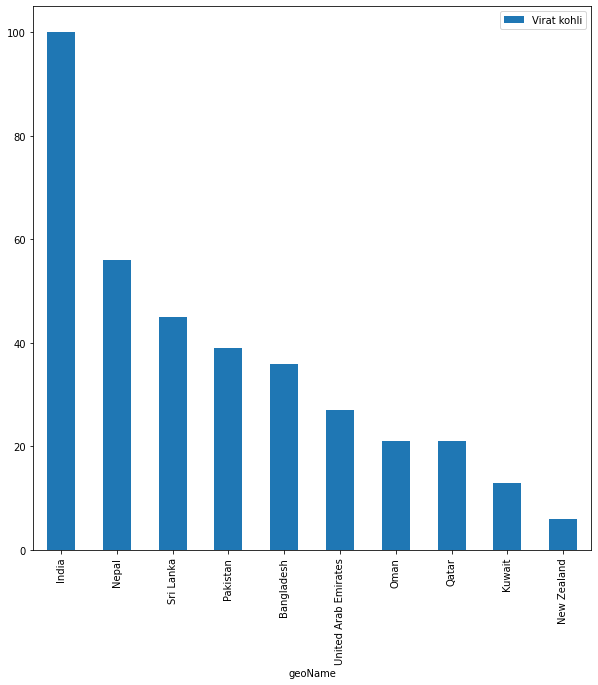

In [6]:
df2.reset_index().plot(x='geoName', y=Searchterm, figsize=(10, 10), kind ='bar')

In [7]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword = Searchterm)
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Virat Kohli,Indian cricketer
1,ONE8 One 8 by Virat Kohli Pure Perfume Body Sp...,Topic


In [8]:
pytrend.build_payload(kw_list=[Searchterm])

# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                                      query  value
0                                  anushka    100
1                            virat anushka    100
2               anushka sharma virat kohli     93
3   virat kohli virat kohli anushka sharma     91
4                           anushka sharma     89
5                                    india     69
6                                  cricket     59
7                      virat kohli cricket     57
8                                    dhoni     52
9                          virat kohli ipl     47
10                                     ipl     47
11                            rohit sharma     43
12                         virat kohli age     42
13                                  sachin     36
14                       virat kohli video     31
15                      virat kohli images     30
16                        sachin tendulkar     29
17                       virat kohli photo     28
18                           

In [9]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value  ...            topic_type
0   47350  ...            Tournament
1   45950  ...   Pakistani cricketer
2   38100  ...      Indian cricketer
3   30650  ...            Tournament
4   25950  ...  Sports league season
5   23750  ...                  Food
6   22950  ...      Indian cricketer
7   21500  ...            Tournament
8   20800  ...                 Topic
9   16250  ...      Afghan cricketer
10   3200  ...                 Topic
11   2150  ...      Indian cricketer
12   2100  ...      Indian cricketer
13   1600  ...      Indian talk show
14    750  ...      Indian cricketer
15    600  ...  Sports league season
16    600  ...      Indian cricketer
17    550  ...          Cricket team
18    400  ...     English cricketer
19    400  ...          Cricket team
20    350  ...         Indian singer
21    350  ...                 Topic
22    300  ...                 Topic
23    200  ...               Website
24    160  ...                 Topic

[25 rows x 6 

In [10]:
# Compare multiple search terms

Searchterms = ["Virat Kohli", "Rohit sharma", "Sachin tendulkar"]
pytrend.build_payload(kw_list=Searchterms, timeframe='today 3-m')
history = pytrend.interest_over_time()
history.head(10)

,Virat Kohli,Rohit sharma,Sachin tendulkar,isPartial
date,,,,
2021-01-04,11,7,2,False
2021-01-05,14,7,3,False
2021-01-06,16,8,2,False
2021-01-07,13,7,2,False
2021-01-08,14,14,2,False
2021-01-09,16,6,2,False
2021-01-10,15,12,3,False
2021-01-11,100,9,4,False
2021-01-12,64,4,2,False


In [11]:
history.tail(10)

,Virat Kohli,Rohit sharma,Sachin tendulkar,isPartial
date,,,,
2021-03-23,28,16,5,False
2021-03-24,14,7,2,False
2021-03-25,9,6,2,False
2021-03-26,27,15,4,False
2021-03-27,13,4,16,False
2021-03-28,24,15,10,False
2021-03-29,12,4,5,False
2021-03-30,9,3,3,False
2021-03-31,12,3,3,False


In [12]:
data = history['Virat Kohli']
data.head(10)

date
2021-01-04     11
2021-01-05     14
2021-01-06     16
2021-01-07     13
2021-01-08     14
2021-01-09     16
2021-01-10     15
2021-01-11    100
2021-01-12     64
2021-01-13     30
Name: Virat Kohli, dtype: int64

In [13]:
df = pd.DataFrame(data)
df.head()

,Virat Kohli
date,
2021-01-04,11
2021-01-05,14
2021-01-06,16
2021-01-07,13
2021-01-08,14


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2021-01-04 to 2021-04-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Virat Kohli  88 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [15]:
df.describe()

,Virat Kohli
count,88.000000
mean,16.022727
std,11.983684
min,7.000000
25%,10.000000
50%,14.000000
75%,17.000000
max,100.000000


In [16]:
# Initialize plotly
init_notebook_mode(connected=True)

In [17]:
def plotly_df(df, title=''):
    # Visualize all the dataframe columns as line plots
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [18]:
df = df.reset_index()
df.columns = ['ds', 'y']
df.tail(n=3)

,ds,y
85,2021-03-30,9
86,2021-03-31,12
87,2021-04-01,15


In [19]:
prediction_size = 5
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
80,2021-03-25,9
81,2021-03-26,27
82,2021-03-27,13


In [33]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

,ds
85,2021-03-30
86,2021-03-31
87,2021-04-01


In [22]:
forecast = m.predict(future)
forecast.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
85,2021-03-30,13.555580,1.571991,32.189251,13.555357,13.555814,4.129525,4.129525,4.129525,4.129525,4.129525,4.129525,0.0,0.0,0.0,17.685105
86,2021-03-31,13.498169,-2.931506,25.430416,13.497761,13.498567,-2.562424,-2.562424,-2.562424,-2.562424,-2.562424,-2.562424,0.0,0.0,0.0,10.935745
87,2021-04-01,13.440758,-5.280533,24.574329,13.440183,13.441335,-3.336965,-3.336965,-3.336965,-3.336965,-3.336965,-3.336965,0.0,0.0,0.0,10.103792


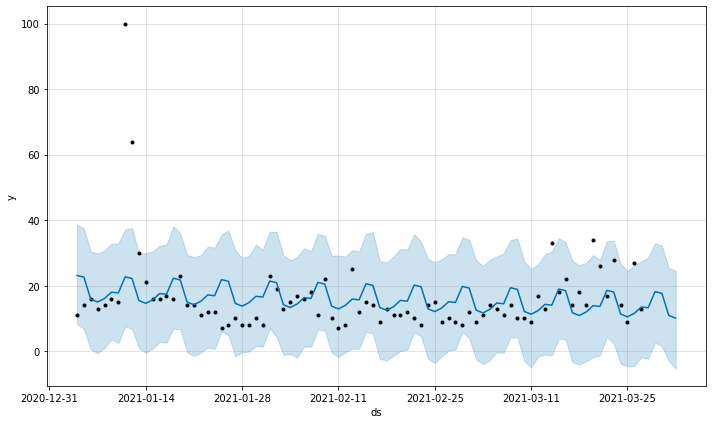

In [23]:
m.plot(forecast);

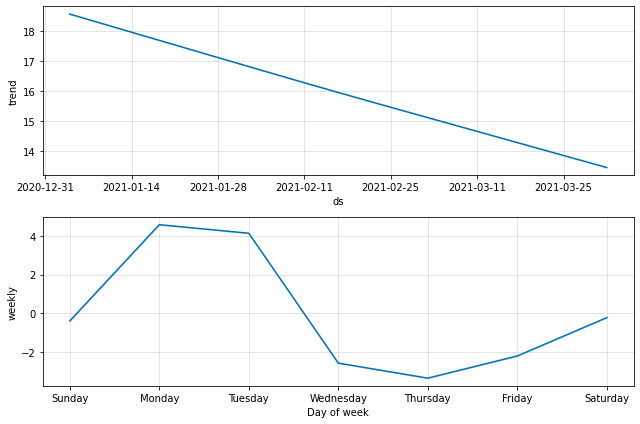

In [24]:
m.plot_components(forecast);

In [25]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [26]:
def make_comparison_dataframe(historical, forecast):
    # Join the history with the forecast.
    # The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [27]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2021-03-30,17.685105,1.571991,32.189251,9
2021-03-31,10.935745,-2.931506,25.430416,12
2021-04-01,10.103792,-5.280533,24.574329,15


In [28]:
def calculate_forecast_errors(df, prediction_size):
    # Calculate MAPE and MAE of the forecast.
   
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [29]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 46.83902118648687
MAE 6.309209454517459


In [30]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    # Visualizing the forecast.
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Search index'), title=title, showlegend = False)
    fig = go.FigureWidget(data=data, layout=layout)
    fig.show()

show_forecast(cmp_df, prediction_size, 100, 'Forcasted search index')

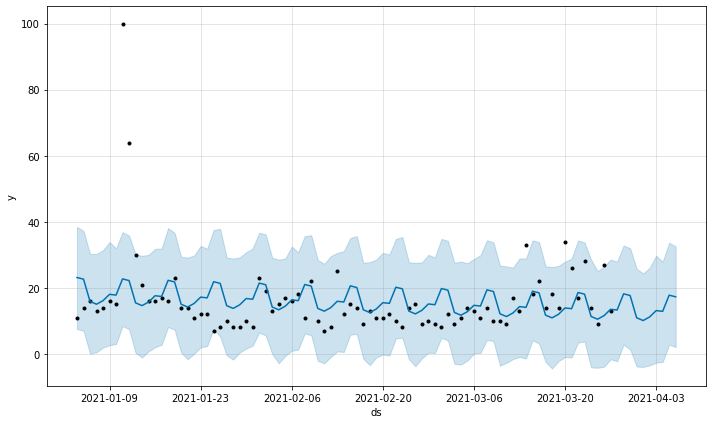

In [31]:
future = m.make_future_dataframe(periods=10)
fcst = m.predict(future)
fig = m.plot(fcst)